In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

### Гипотезы:

1. Поп-апы летом (июнь–август) менее эффективны в Европе, но более эффективны в Азии. +

2. Долгосрочные временные магазины (>30 дней) показывают снижение продаж после первого месяца. +

3.  Нишевые бренды более успешны во временных магазинах, чем масс-маркет бренды. +

4. Продукты из категории «светящихся» (Glow) или «шиммер» (Pearl) имеют более высокий процент продаж в торговом центре. *

5. Shop-in-Shop форматы более эффективны в торговых центрах, чем в аэропортах. *


In [31]:
df1=pd.read_csv('cosmetic.csv')
df1

,event_id,brand,region,city,location_type,event_type,start_date,end_date,lease_length_days,sku,product_name,price_usd,avg_daily_footfall,units_sold,sell_through_pct
0,POP100282,Charlotte Tilbury,North America,Miami,Art/Design District,Flash Event,2024-02-25,2024-03-02,6,LE-UQYNQA1A,Charlotte Tilbury Glow Mascara,62.21,1107,3056,98.90
1,POP102014,Valentino Beauty,North America,New York,Airport Duty-Free,Flash Event,2024-03-17,2024-06-09,84,LE-9E9FTDSM,Valentino Beauty Pearl Eyeshadow Palette,77.93,1652,2782,86.32
2,POP101719,YSL Beauty,Europe,Berlin,Airport Duty-Free,Standalone Pop-Up,2025-02-26,2025-03-10,12,LE-W921CLUG,YSL Beauty Glow Eyeshadow Palette,149.91,752,2720,69.18
3,POP100994,Hermès Beauty,North America,Chicago,Airport Duty-Free,Standalone Pop-Up,2025-07-06,2025-08-04,29,LE-MPO4BX6H,Hermès Beauty Pearl Highlighter,80.32,1688,203,66.78
4,POP102033,Tom Ford Beauty,Europe,London,High-Street,Shop-in-Shop,2024-12-06,2024-12-25,19,LE-M3D94MYP,Tom Ford Beauty Noir Highlighter,56.15,1012,1292,80.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,POP101638,Dior,North America,Toronto,Department Store Atrium,Shop-in-Shop,2024-09-19,2024-11-23,65,LE-J7KHKHWQ,Dior Glow Primer,44.27,1668,1180,64.06
2129,POP101095,Guerlain,Middle East,Dubai,Department Store Atrium,Shop-in-Shop,2024-08-07,2024-09-09,33,LE-H9OI4HZZ,Guerlain Satin Primer,63.66,1350,1293,69.00
2130,POP101130,Givenchy Beauty,North America,Toronto,Airport Duty-Free,Standalone Pop-Up,2025-01-14,2025-04-05,81,LE-NDYDZF2H,Givenchy Beauty Pearl Blush,38.68,2121,793,79.30
2131,POP101294,Tom Ford Beauty,Europe,Paris,Art/Design District,Mall Kiosk,2024-03-02,2024-04-10,39,LE-JOHHW772,Tom Ford Beauty Pearl Primer,53.40,1210,548,70.71


event_id - Уникальный идентификатор для каждого всплывающего окна.

brand - Бренд косметики класса люкс/премиум проводит акцию.

region - Регион макроранжа (Северная Америка, Европа, Ближний Восток, Азиатско-Тихоокеанский регион, Латинская Америка).

city - Город, в котором проходило мероприятие; иногда значение равно null, чтобы имитировать пробелы в реальных данных.

location_type - Архетип места проведения: главная улица, элитный торговый центр, атриум университета, магазин беспошлинной торговли в аэропорту, район искусства и дизайна.

event_type - Формат pop-up: автономный, «магазин в магазине», мобильный грузовик, флеш-моб, киоск в торговом центре.

start_date - Дата начала мероприятия.

end_date - Дата окончания мероприятия, может быть указана как null (например, продолжается/уточняется), чтобы отразить операционную неопределённость.

lease_length_days - Срок активации (в днях) соответствует краткосрочной аренде.

sku - Код продукта с ограниченным выпуском, привязанный к событию/набору данных.

product_name - Список брендовых товаров (дескрипторы, ориентированные на роскошь + категории).

price_usd - Цена билета (в долларах США) соответствует ценовым категориям элитной косметики.

avg_daily_foxfail - Предполагаемое среднее количество посетителей в день в зависимости от места проведения, формата и интенсивности мероприятий.

units_sold - Общее количество единиц, проданных в течение периода проведения мероприятия; ограничено динамикой распределения.

sell_through_pct - Доля проданных выделенных запасов (%), показатель силы спроса и успешности запуска.

In [32]:
uniqu = df1['event_type'].unique()
uniqu

array(['Flash Event', 'Standalone Pop-Up', 'Shop-in-Shop', 'Mall Kiosk',
       'Mobile Pop-Up Truck'], dtype=object)

Flash Event — Флэш-ивент или Всплывающее мероприятие
(Краткосрочное, часто анонсируемое в последний момент мероприятие, создающее ажиотаж).

Standalone Pop-Up — Отдельный поп-ап или Автономный временный магазин
(Временная торговая точка, которая работает самостоятельно, не внутри другого магазина).

Shop-in-Shop — Магазин в магазине
(Концепция, когда один бренд открывает свой небольшой отдел или зону внутри крупного ритейлера).

Mall Kiosk — Торговый киоск в торговом центре
(Небольшой островной павильон или стойка в общем пространстве молла).

Mobile Pop-Up Truck — Мобильный поп-ап в грузовике или Поп-ап на колесах
(Торговая точка, размещенная в автомобиле (часто в грузовике или фургоне), которая может перемещаться по разным локациям).

In [33]:
uniqu = df1['location_type'].unique()
uniqu

array(['Art/Design District', 'Airport Duty-Free', 'High-Street',
       'Department Store Atrium', 'Luxury Mall'], dtype=object)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id            2133 non-null   object 
 1   brand               2133 non-null   object 
 2   region              2133 non-null   object 
 3   city                2086 non-null   object 
 4   location_type       2133 non-null   object 
 5   event_type          2133 non-null   object 
 6   start_date          2133 non-null   object 
 7   end_date            2097 non-null   object 
 8   lease_length_days   2133 non-null   int64  
 9   sku                 2133 non-null   object 
 10  product_name        2133 non-null   object 
 11  price_usd           2133 non-null   float64
 12  avg_daily_footfall  2133 non-null   int64  
 13  units_sold          2133 non-null   int64  
 14  sell_through_pct    2133 non-null   float64
dtypes: float64(2), int64(3), object(10)
memory usage: 250.1

In [35]:
df1.isnull().sum()

event_id               0
brand                  0
region                 0
city                  47
location_type          0
event_type             0
start_date             0
end_date              36
lease_length_days      0
sku                    0
product_name           0
price_usd              0
avg_daily_footfall     0
units_sold             0
sell_through_pct       0
dtype: int64

In [36]:
df1['end_date'] = pd.to_datetime(df1['end_date'])
df1['start_date'] = pd.to_datetime(df1['start_date'])

In [37]:
df2 = df1.dropna()
df2

,event_id,brand,region,city,location_type,event_type,start_date,end_date,lease_length_days,sku,product_name,price_usd,avg_daily_footfall,units_sold,sell_through_pct
0,POP100282,Charlotte Tilbury,North America,Miami,Art/Design District,Flash Event,2024-02-25,2024-03-02,6,LE-UQYNQA1A,Charlotte Tilbury Glow Mascara,62.21,1107,3056,98.90
1,POP102014,Valentino Beauty,North America,New York,Airport Duty-Free,Flash Event,2024-03-17,2024-06-09,84,LE-9E9FTDSM,Valentino Beauty Pearl Eyeshadow Palette,77.93,1652,2782,86.32
2,POP101719,YSL Beauty,Europe,Berlin,Airport Duty-Free,Standalone Pop-Up,2025-02-26,2025-03-10,12,LE-W921CLUG,YSL Beauty Glow Eyeshadow Palette,149.91,752,2720,69.18
3,POP100994,Hermès Beauty,North America,Chicago,Airport Duty-Free,Standalone Pop-Up,2025-07-06,2025-08-04,29,LE-MPO4BX6H,Hermès Beauty Pearl Highlighter,80.32,1688,203,66.78
4,POP102033,Tom Ford Beauty,Europe,London,High-Street,Shop-in-Shop,2024-12-06,2024-12-25,19,LE-M3D94MYP,Tom Ford Beauty Noir Highlighter,56.15,1012,1292,80.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,POP101638,Dior,North America,Toronto,Department Store Atrium,Shop-in-Shop,2024-09-19,2024-11-23,65,LE-J7KHKHWQ,Dior Glow Primer,44.27,1668,1180,64.06
2129,POP101095,Guerlain,Middle East,Dubai,Department Store Atrium,Shop-in-Shop,2024-08-07,2024-09-09,33,LE-H9OI4HZZ,Guerlain Satin Primer,63.66,1350,1293,69.00
2130,POP101130,Givenchy Beauty,North America,Toronto,Airport Duty-Free,Standalone Pop-Up,2025-01-14,2025-04-05,81,LE-NDYDZF2H,Givenchy Beauty Pearl Blush,38.68,2121,793,79.30
2131,POP101294,Tom Ford Beauty,Europe,Paris,Art/Design District,Mall Kiosk,2024-03-02,2024-04-10,39,LE-JOHHW772,Tom Ford Beauty Pearl Primer,53.40,1210,548,70.71


In [38]:
df2.isnull().sum()

event_id              0
brand                 0
region                0
city                  0
location_type         0
event_type            0
start_date            0
end_date              0
lease_length_days     0
sku                   0
product_name          0
price_usd             0
avg_daily_footfall    0
units_sold            0
sell_through_pct      0
dtype: int64

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2050 entries, 0 to 2132
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   event_id            2050 non-null   object        
 1   brand               2050 non-null   object        
 2   region              2050 non-null   object        
 3   city                2050 non-null   object        
 4   location_type       2050 non-null   object        
 5   event_type          2050 non-null   object        
 6   start_date          2050 non-null   datetime64[ns]
 7   end_date            2050 non-null   datetime64[ns]
 8   lease_length_days   2050 non-null   int64         
 9   sku                 2050 non-null   object        
 10  product_name        2050 non-null   object        
 11  price_usd           2050 non-null   float64       
 12  avg_daily_footfall  2050 non-null   int64         
 13  units_sold          2050 non-null   int64         
 1

## ГИПОТЕЗА 1: "Поп-апы" летом менее эффективны в Европе, но более эффективны в Азии.

In [40]:
summer_df = df2[(df2['start_date'].dt.month.isin([6, 7, 8])) & (df2['event_type'].isin(['Mobile Pop-Up Truck'])) & (df2['region'].isin(['Europe', 'Asia-Pacific']))]

city_to_country = {
    
    # Europe
    'Berlin': 'Germany',
    'London': 'United Kingdom',
    'Madrid': 'Spain',
    'Milan': 'Italy',
    'Paris': 'France',
    
    # Asia-Pacific
    'Tokyo': 'Japan',
    'Seoul': 'South Korea',
    'Shanghai': 'China',
    'Hong Kong': 'Hong Kong',
    'Singapore': 'Singapore',
}

city_to_region = {

    'Berlin': 'Europe',
    'London': 'Europe',
    'Madrid': 'Europe',
    'Milan': 'Europe',
    'Paris': 'Europe',
    
    'Tokyo': 'Asia-Pacific',
    'Seoul': 'Asia-Pacific',
    'Shanghai': 'Asia-Pacific',
    'Hong Kong': 'Asia-Pacific',
    'Singapore': 'Asia-Pacific',
    
}

summer_df['country'] = summer_df['city'].map(city_to_country)
summer_df['region'] = summer_df['city'].map(city_to_region)

# Группируем для средних значений
country_avg = summer_df.groupby('country').agg({
    'sell_through_pct': 'mean',
    'region': 'first',
    'city': lambda x: ', '.join(x.unique())  # список городов для каждой страны
}).reset_index()

fig = px.choropleth(
    country_avg,
    locations='country',
    color='sell_through_pct',
    hover_name='country',
    hover_data={
        'region': True,
        'sell_through_pct': ':.2f',
        'city': True  # показываем список городов
    },
    color_continuous_scale='RdYlGn',
    title='Средний процент продаж по странам (Лето)',
    labels={'sell_through_pct': 'Средний процент продаж'},
    locationmode='country names',
    scope='world'
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth',
    ),
    width=1200, 
    height=700,
    coloraxis_colorbar=dict(
        title="Средний % продаж",
        tickformat=".0f%" 
    )
)

fig.show()

C:\Users\UserHome\AppData\Local\Temp\ipykernel_7416\2896052298.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\UserHome\AppData\Local\Temp\ipykernel_7416\2896052298.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



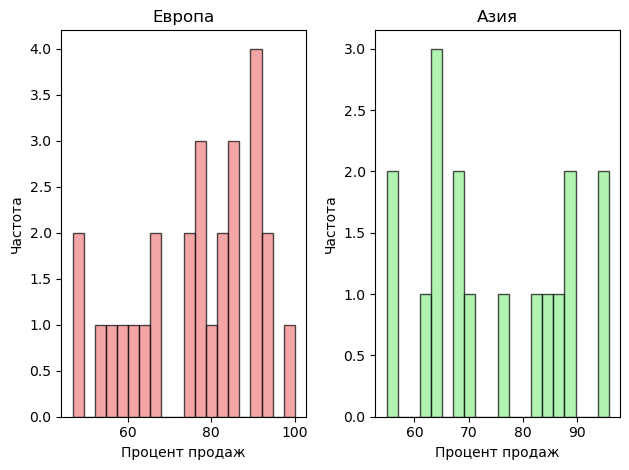

In [41]:
import matplotlib.pyplot as plt

europe_data = summer_df[summer_df['region'] == 'Europe']['sell_through_pct']
asia_data = summer_df[summer_df['region'] == 'Asia-Pacific']['sell_through_pct']

plt.subplot(1, 2, 1)
plt.hist(europe_data, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Европа')
plt.xlabel('Процент продаж')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(asia_data, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Азия')
plt.xlabel('Процент продаж')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [42]:
import scipy.stats as stats
import pandas as pd

europe_data = summer_df[summer_df['region'] == 'Europe']['sell_through_pct']
asia_data = summer_df[summer_df['region'] == 'Asia-Pacific']['sell_through_pct']


# print(f"Размер Europe данных: {len(europe_data)}")
# print(f"Размер Asia-Pacific данных: {len(asia_data)}")

# print(f"\nEurope - среднее: {europe_data.mean():.2f}%, std: {europe_data.std():.2f}")
# print(f"Asia-Pacific - среднее: {asia_data.mean():.2f}%, std: {asia_data.std():.2f}")

u_stat, p_value = stats.mannwhitneyu(europe_data, asia_data, alternative='greater')

print("Использован тест Манна-Уитни так как распределение не нормальное")
print(f"p-value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print(f"Статистически значимые различия ОБНАРУЖЕНЫ")

else:
    print('Статистически значимых различий НЕТ ОБНАРУЖЕНО. Нет доказательств различий в эффективности поп-апов между регионами')


Использован тест Манна-Уитни так как распределение не нормальное
p-value: 0.3588
Статистически значимых различий НЕТ ОБНАРУЖЕНО. Нет доказательств различий в эффективности поп-апов между регионами


## ГИПОТЕЗА 2: Долгосрочные временные магазины (>30 дней) показывают снижение продаж после первого месяца.

C:\Users\UserHome\AppData\Local\Temp\ipykernel_7416\4192406228.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\UserHome\AppData\Local\Temp\ipykernel_7416\4192406228.py:36: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


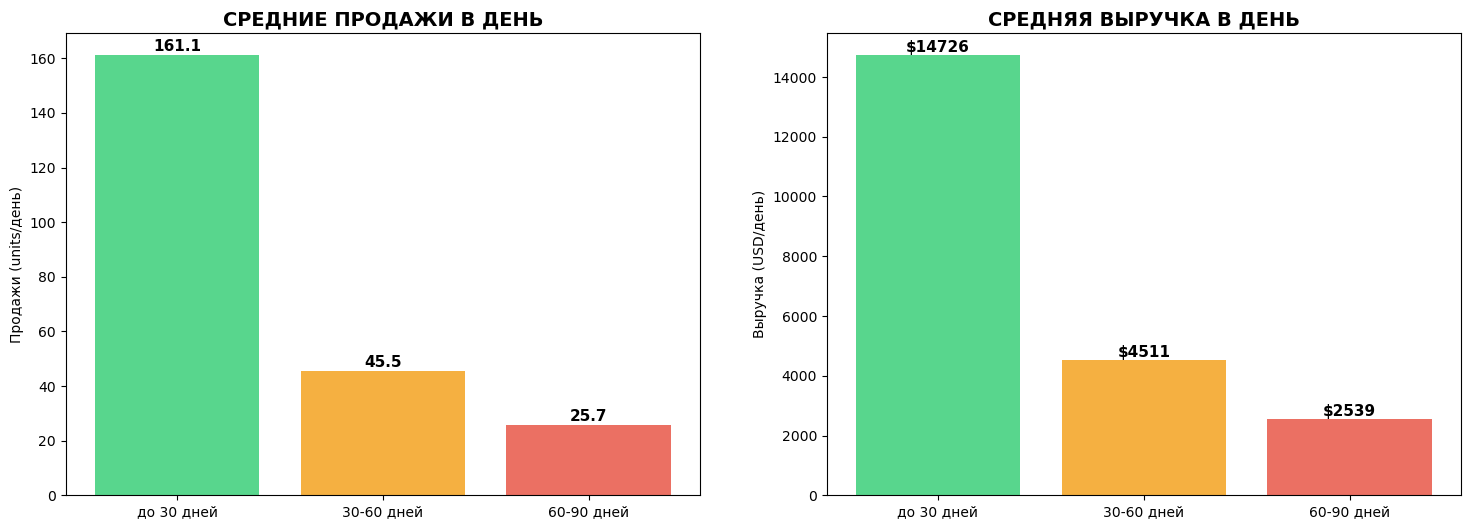

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = df2.copy()
df['lease_category'] = pd.cut(df['lease_length_days'], 
                             bins=[0, 30, 60, 90, 1000],
                             labels=['до 30 дней', '30-60 дней', '60-90 дней', 'более 90 дней'])


df['sales_per_day'] = df['units_sold'] / df['lease_length_days']
df['revenue_per_day'] = (df['units_sold'] * df['price_usd']) / df['lease_length_days']


analysis_categories = ['до 30 дней', '30-60 дней', '60-90 дней']
filtered_df = df[df['lease_category'].isin(analysis_categories)]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sales_comparison = filtered_df.groupby('lease_category')['sales_per_day'].mean()
colors = ['#2ecc71', '#f39c12', '#e74c3c']  

bars1 = axes[0].bar(sales_comparison.index, sales_comparison.values, color=colors, alpha=0.8)
axes[0].set_title('СРЕДНИЕ ПРОДАЖИ В ДЕНЬ', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Продажи (units/день)')
axes[0].tick_params(axis='x', rotation=0)


for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)


revenue_comparison = filtered_df.groupby('lease_category')['revenue_per_day'].mean()
bars2 = axes[1].bar(revenue_comparison.index, revenue_comparison.values, color=colors, alpha=0.8)
axes[1].set_title('СРЕДНЯЯ ВЫРУЧКА В ДЕНЬ', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Выручка (USD/день)')
axes[1].tick_params(axis='x', rotation=0)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 5,
                f'${height:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=11)



## ГИПОТЕЗА 3: Нишевые бренды более успешны, чем масс-маркет бренды

In [44]:
from scipy import stats
import plotly.express as px

niche_brands = [
    'Charlotte Tilbury', 'Pat McGrath Labs', 'Hourglass', 'Huda Beauty', 
    'Rare Beauty', 'Fenty Beauty', 'Tom Ford Beauty', 'La Prairie', 
    'Clé de Peau Beauté', 'Sisley-Paris', 'Guerlain', 'Givenchy Beauty', 
    'Hermès Beauty', 'Valentino Beauty', 'Armani Beauty', 'YSL Beauty'
]

df2['brand_type'] = df2['brand'].apply(lambda x: 'Niche' if x in niche_brands else 'Mass-Market Premium')

niche_sell = df2[df2['brand_type'] == 'Niche']['sell_through_pct']
mass_sell = df2[df2['brand_type'] == 'Mass-Market Premium']['sell_through_pct']

fig = px.bar(
    x=["Нишевые бренды", "Мас-маркет"],
    y=[niche_sell.mean(), mass_sell.mean()],
    title="Сравнение процента продаж",
    labels={'x': 'Тип продукта', 'y': 'Средний процент продаж'},
)

fig.update_traces(
    text=[f"{niche_sell.mean():.1f}%", f"{mass_sell.mean():.1f}%"],
    textposition='outside',
    showlegend=False
)

fig.update_layout(
    yaxis_range=[0, max(niche_sell.mean(), mass_sell.mean()) * 1.2],
    width=1000, 
    height=700,
)

fig.show()


t_stat, p_value = stats.ttest_ind(niche_sell, mass_sell, nan_policy='omit')

alpha = 0.05
if p_value < alpha:
    print("Статистически значимые различия ЕСТЬ")
    if niche_sell.mean() > mass_sell.mean():
        print("Нишевые бренды имеют более высокий процент продаж")
    else:
        print("Масс-маркет бренды имеют более высокий процент продаж")
else:
    print("Статистически значимых различий НЕТ")

C:\Users\UserHome\AppData\Local\Temp\ipykernel_7416\1476169911.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Статистически значимых различий НЕТ


 ## ГИПОТЕЗА 4: Продукты из категории «светящихся» (Glow) имеют более высокий процент продаж в торговом центре.

In [45]:
uniqu = df1['location_type'].unique()
uniqu

array(['Art/Design District', 'Airport Duty-Free', 'High-Street',
       'Department Store Atrium', 'Luxury Mall'], dtype=object)

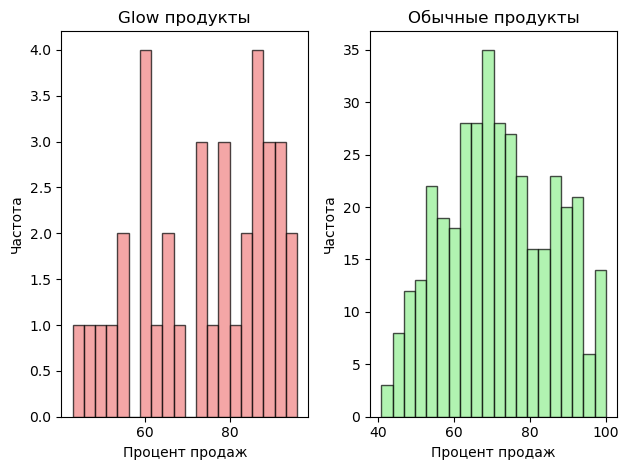

In [46]:
import matplotlib.pyplot as plt

luxury_mall = df2[df2["location_type"] == "Luxury Mall"]
glow_mask = luxury_mall["product_name"].str.contains("Glow", na=False)
glow_group = luxury_mall[glow_mask]["sell_through_pct"]
non_glow_group = luxury_mall[~glow_mask]["sell_through_pct"]

plt.subplot(1, 2, 1)
plt.hist(glow_group, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Glow продукты')
plt.xlabel('Процент продаж')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(non_glow_group, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Обычные продукты')
plt.xlabel('Процент продаж')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [47]:
from scipy import stats

# Для одной переменной
stat, p_value = stats.shapiro(non_glow_group)
print(f"Shapiro-Wilk test: statistic={stat:.4f}, p-value={p_value:.4f}")

# Интерпретация:
if p_value > 0.05:
    print("Распределение нормальное (не отвергаем H0)")
else:
    print("Распределение НЕ нормальное (отвергаем H0)")

Shapiro-Wilk test: statistic=0.9818, p-value=0.0001
Распределение НЕ нормальное (отвергаем H0)


In [48]:
import pandas as pd
import scipy.stats as stats

u_stat, p_value = stats.mannwhitneyu(glow_group, non_glow_group, alternative='greater')

print("Использован тест Манна-Уитни так как распределение не нормальное")
print(f"p-value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Есть статистически значимые различия (не отвергаем H0).")
    print("Glow продукты продаются лучше.")
else:
    print("Нет статистически значимых различий (отвергаем H0).")
    print("Гипотеза: 'В торговом центре Glow продукты продаются лучше' - НЕ ПОДТВЕРЖДЕНА")

fig = px.bar(
    x=["Блестки", "Не блестки"],
    y=[glow_group.mean(), non_glow_group.mean()],
    title="Сравнение процента продаж",
    labels={'x': 'Тип продукта', 'y': 'Средний процент продаж'},
)

fig.update_traces(
    text=[f"{glow_group.mean():.1f}%", f"{non_glow_group.mean():.1f}%"],
    textposition='outside',
    showlegend=False 
)

fig.update_layout(
    yaxis_range=[0, max(glow_group.mean(), non_glow_group.mean()) * 1.2],
    showlegend=True,
    legend_title="Тип продукта",
    width=1000, 
    height=700,
)
fig.show()

Использован тест Манна-Уитни так как распределение не нормальное
p-value: 0.1494
Нет статистически значимых различий (отвергаем H0).
Гипотеза: 'В торговом центре Glow продукты продаются лучше' - НЕ ПОДТВЕРЖДЕНА


## Гипотеза 5: Shop-in-Shop форматы более эффективны в торговых центрах, чем в аэропортах.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

shop_df = df2[df2['event_type'] == 'Shop-in-Shop']

mall_events = shop_df[shop_df['location_type'] == 'Luxury Mall']
airport_events = shop_df[shop_df['location_type'] == 'Airport Duty-Free']


t_stat, p_value = ttest_ind(mall_events["sell_through_pct"], airport_events["sell_through_pct"])

mall_avg = mall_events["sell_through_pct"].mean()
airport_avg = airport_events["sell_through_pct"].mean()

print(f"Средний % продаж в ТЦ: {mall_avg:.1f} %")
print(f"Средний % продаж в аэропортах: {airport_avg:.1f}%")
print()
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Разница статистически значима - гипотеза подтверждается")
else:
    print("Разница НЕ значима - гипотеза НЕ подтверждается")

fig = px.bar(
    x=["Торговые центры", "Аэропорты"],
    y=[mall_avg, airport_avg],
    title="Сравнение процента продаж",
    labels={'x': 'Тип локации', 'y': 'Процент'},
    color_discrete_sequence=["lightcoral"] 
)
fig.update_traces(
    text=[f"{mall_avg:.1f}%", f"{airport_avg:.1f}%"],
    textposition='outside',
    showlegend=False
)
fig.update_layout(
    yaxis_range=[0, max(mall_avg, airport_avg) * 1.2],
)
fig.show()

Средний % продаж в ТЦ: 71.9 %
Средний % продаж в аэропортах: 69.0%

P-value: 0.1983
Разница НЕ значима - гипотеза НЕ подтверждается
